<a href="https://colab.research.google.com/github/Qurratulain2/lab-8/blob/main/IND_405_FINAL_REPORT_DRAFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOAD FILES

In [ ]:
#import
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Dataset_of_Diabetes.csv")

# 2. Unsupervised Learning


K MEANS CLUSTERING

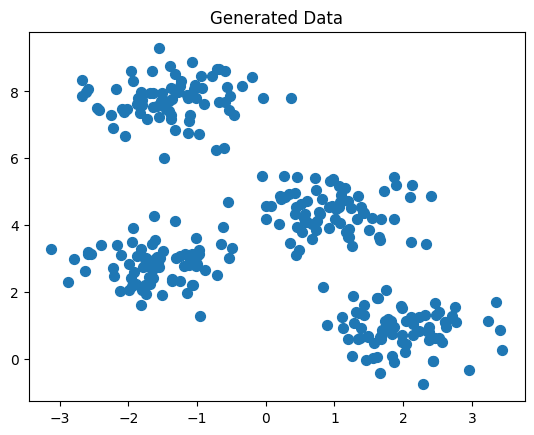

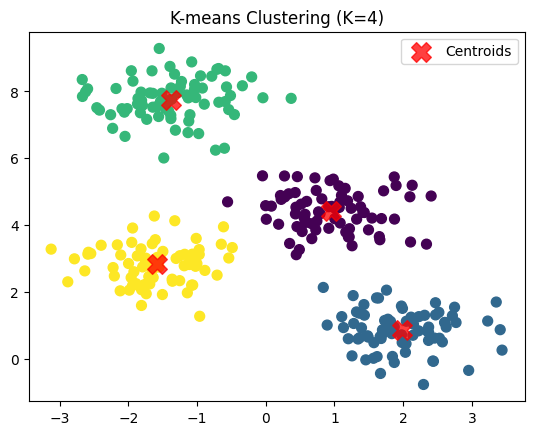

In [ ]:
# Importing libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Example data
from sklearn.datasets import make_blobs

# Generate synthetic dataset
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# Scatter plot of the data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Generated Data")
plt.show()

# K-means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label="Centroids")
plt.title("K-means Clustering (K=4)")
plt.legend()
plt.show()



HIERARCHICAL CLUSTERING

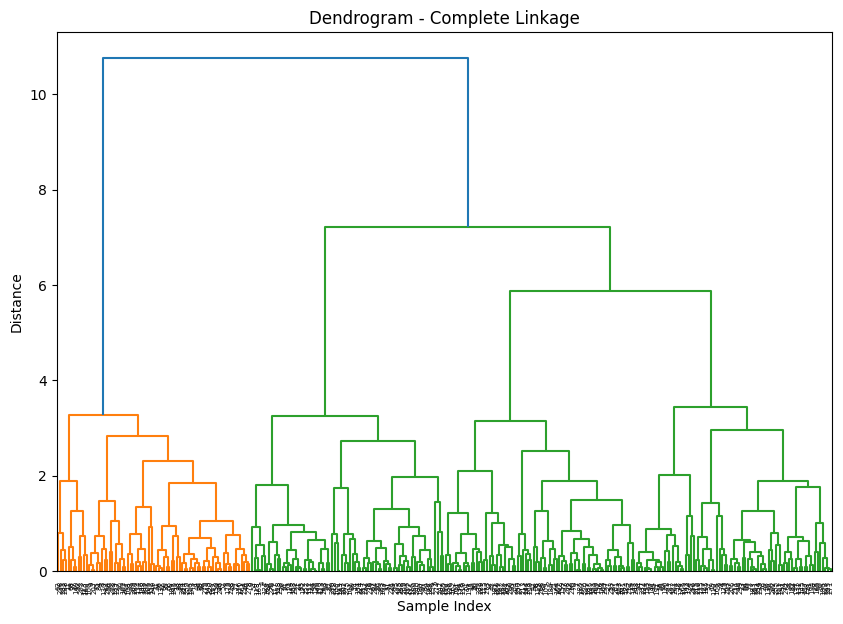

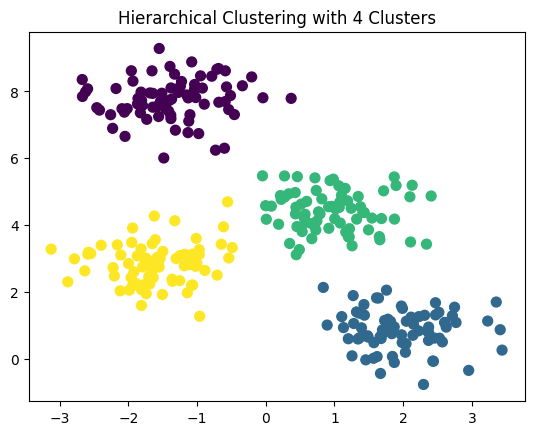

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Generate synthetic data (same as above)
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# Hierarchical clustering (Complete Linkage)
linked = linkage(X, method='complete')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title("Dendrogram - Complete Linkage")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# Assign clusters based on maximum distance
n_clusters = 4
cluster_labels = fcluster(linked, n_clusters, criterion='maxclust')

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=50, cmap='viridis')
plt.title(f"Hierarchical Clustering with {n_clusters} Clusters")
plt.show()


Elbow Method to Find Optimal K

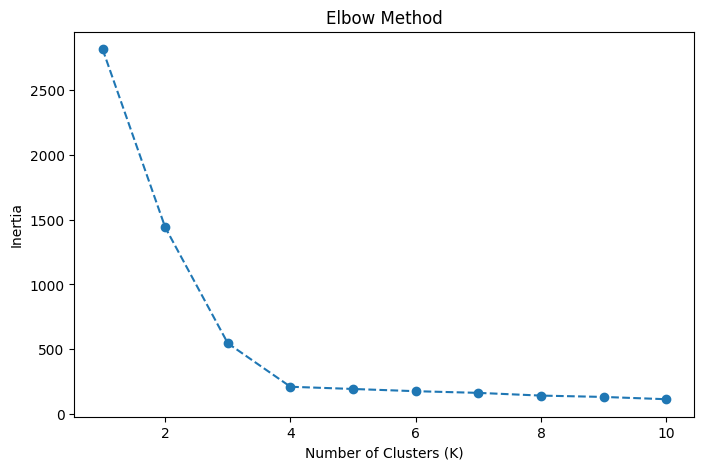

In [ ]:
# Elbow Method
inertia = []

# Test for K values from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

2D visualization pca

3. SUPERVISED

Regression

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('Dataset_of_Diabetes.csv')  # Ensure this file is in the correct directory

# Convert non-numeric columns to numeric
if 'Gender' in df.columns:
    df['Gender'] = df['Gender'].map({'M': 1, 'F': 0})

# Drop irrelevant columns
df.drop(columns=['CLASS', 'ID'], inplace=True, errors='ignore')

# Check for non-numeric columns and convert them
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"Non-numeric column detected: {column}")
        df[column] = pd.to_numeric(df[column], errors='coerce')

# Handle missing values
df.fillna(df.mean(), inplace=True)

# Target variable: Chol (or BMI)
labels = np.array(df['Chol'])  # Replace 'Chol' with 'BMI' if needed

# Features: Exclude the target ('Chol')
features = df.drop(columns=['Chol'])

# Split into training and testing sets (80/20)
train_instances, test_instances, train_labels, test_labels = train_test_split(
    features, labels, test_size=0.2, random_state=42
)

# Define a function to evaluate results
def evaluate_results(gTestLabel, gTestPredictions):
    mse = round(mean_squared_error(gTestLabel, gTestPredictions), 2)
    rmse = np.sqrt(mse)
    var_score = round(r2_score(gTestLabel, gTestPredictions), 2)
    return mse, rmse, var_score

# Linear Regression
print("\n--- Linear Regression ---")
linear_model = LinearRegression()
linear_model.fit(train_instances, train_labels)
linear_predictions = linear_model.predict(test_instances)
mse, rmse, r2 = evaluate_results(test_labels, linear_predictions)
print(f"MSE: {mse}, RMSE: {rmse}, R2 Score: {r2}")

# KNN Regression
print("\n--- KNN Regression ---")
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(train_instances, train_labels)
knn_predictions = knn_model.predict(test_instances)
mse, rmse, r2 = evaluate_results(test_labels, knn_predictions)
print(f"MSE: {mse}, RMSE: {rmse}, R2 Score: {r2}")

# Decision Tree Regression
print("\n--- Decision Tree Regression ---")
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(train_instances, train_labels)
tree_predictions = tree_model.predict(test_instances)
mse, rmse, r2 = evaluate_results(test_labels, tree_predictions)
print(f"MSE: {mse}, RMSE: {rmse}, R2 Score: {r2}")

# Random Forest Regression
print("\n--- Random Forest Regression ---")
forest_model = RandomForestRegressor(random_state=42, n_estimators=100)
forest_model.fit(train_instances, train_labels)
forest_predictions = forest_model.predict(test_instances)
mse, rmse, r2 = evaluate_results(test_labels, forest_predictions)
print(f"MSE: {mse}, RMSE: {rmse}, R2 Score: {r2}")



--- Linear Regression ---
MSE: 1.29, RMSE: 1.1357816691600546, R2 Score: 0.2

--- KNN Regression ---
MSE: 1.91, RMSE: 1.3820274961085253, R2 Score: -0.19

--- Decision Tree Regression ---
MSE: 2.28, RMSE: 1.5099668870541498, R2 Score: -0.42

--- Random Forest Regression ---
MSE: 0.89, RMSE: 0.9433981132056604, R2 Score: 0.45


Model Training

1. LINEAR AGGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression

# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on test set
y_pred_linear = linear_model.predict(X_test)
print("Linear Regression Training Completed.")


NameError: name 'X_train' is not defined

KNN REGRESSION

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Train KNN Regression model (n_neighbors=5)
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict on test set
y_pred_knn = knn_model.predict(X_test)
print("KNN Regression Training Completed.")


DECISION TREE REGGRESSION

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Train Decision Tree Regression model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Predict on test set
y_pred_tree = tree_model.predict(X_test)
print("Decision Tree Regression Training Completed.")


RANDOM FOREST REGGRESSION

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Regression model
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)

# Predict on test set
y_pred_forest = forest_model.predict(X_test)
print("Random Forest Regression Training Completed.")


PERFORMANCE EVALUATION

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Function to calculate metrics
def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mse, rmse, r2

# Evaluate each model
print("Linear Regression:", evaluate_model(y_test, y_pred_linear))
print("KNN Regression:", evaluate_model(y_test, y_pred_knn))
print("Decision Tree Regression:", evaluate_model(y_test, y_pred_tree))
print("Random Forest Regression:", evaluate_model(y_test, y_pred_forest))


KNN PARAMETER TUNNING

In [ ]:
def tune_knn(X_train, y_train, X_test, y_test):
    best_k = 0
    best_r2 = -1

    for k in range(1, 51):  # Test values from 1 to 50
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        r2 = r2_score(y_test, y_pred)

        if r2 > best_r2:
            best_r2 = r2
            best_k = k

    return best_k, best_r2

# Find the optimal number of neighbors
optimal_k, optimal_r2 = tune_knn(X_train, y_train, X_test, y_test)
print(f"Optimal K: {optimal_k}, R²: {optimal_r2}")


NameError: name 'X_train' is not defined

3.b data preparation

In [ ]:
import pandas as pd
from sklearn.utils import resample

# Simulating a dataset
data = {'feature1': range(1000), 'feature2': range(1000, 2000), 'class_label': [0]*700 + [1]*300}
df = pd.DataFrame(data)

# Categorizing class labels (0 = 'bad', 1 = 'good')
df['category'] = df['class_label'].apply(lambda x: 'good' if x == 1 else 'bad')

# Checking class distribution
print(df['category'].value_counts())

# Balancing the dataset
majority = df[df['class_label'] == 0]
minority = df[df['class_label'] == 1]

# Downsample majority class
majority_downsampled = resample(majority, replace=False, n_samples=300, random_state=42)

# Combine minority and downsampled majority
balanced_df = pd.concat([majority_downsampled, minority])

print(balanced_df['class_label'].value_counts())


category
bad     700
good    300
Name: count, dtype: int64
class_label
0    300
1    300
Name: count, dtype: int64


MODEL TRAINING

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Splitting dataset into train and test
X = balanced_df[['feature1', 'feature2']]
y = balanced_df['class_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression
logr = LogisticRegression()
logr.fit(X_train, y_train)
logr_preds = logr.predict(X_test)
print("Logistic Regression:\n", classification_report(y_test, logr_preds))

# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)
print("KNN:\n", classification_report(y_test, knn_preds))

# Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_preds = dtree.predict(X_test)
print("Decision Tree:\n", classification_report(y_test, dtree_preds))

# Random Forest
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
print("Random Forest:\n", classification_report(y_test, rf_preds))


Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00        82

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180

KNN:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        98
           1       1.00      0.99      0.99        82

    accuracy                           0.99       180
   macro avg       0.99      0.99      0.99       180
weighted avg       0.99      0.99      0.99       180

Decision Tree:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        98
           1       1.00      0.99      0.99        82

    accuracy                           0.99       180
   macro avg       0.99      0.99      0.99       180
weighted avg       0.99      0

Performance Evaluation and Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Logistic Regression Cross-Validation
logr_cv_scores = cross_val_score(logr, X, y, cv=10, scoring='accuracy')
print("Logistic Regression Cross-Validation Scores for each fold:")
print(logr_cv_scores)
print(f"Average Accuracy: {np.mean(logr_cv_scores):.2f}")
print(f"Standard Deviation: {np.std(logr_cv_scores):.2f}")

# Random Forest Cross-Validation
rf_cv_scores = cross_val_score(rf, X, y, cv=10, scoring='accuracy')
print("\nRandom Forest Cross-Validation Scores for each fold:")
print(rf_cv_scores)
print(f"Average Accuracy: {np.mean(rf_cv_scores):.2f}")
print(f"Standard Deviation: {np.std(rf_cv_scores):.2f}")

# Overfitting Analysis
print("\nOverfitting Analysis:")
print("Logistic Regression: If the standard deviation of CV scores is large, it might indicate overfitting.")
print("Random Forest: Compare the standard deviation and check if there are specific folds with anomalies (high or low scores).")



Logistic Regression Cross-Validation Scores for each fold:
[0.76666667 1.         1.         1.         1.         1.
 1.         1.         1.         0.96666667]
Average Accuracy: 0.97
Standard Deviation: 0.07

Random Forest Cross-Validation Scores for each fold:
[0.75       1.         1.         1.         1.         1.
 1.         1.         1.         0.98333333]
Average Accuracy: 0.97
Standard Deviation: 0.07

Overfitting Analysis:
Logistic Regression: If the standard deviation of CV scores is large, it might indicate overfitting.
Random Forest: Compare the standard deviation and check if there are specific folds with anomalies (high or low scores).
